In [1]:
import findspark

findspark.init()

In [2]:
import pyspark

from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.master('spark://DESKTOP-HSK5ETQ.localdomain:7077').appName('Step0-Hands-On').getOrCreate()

21/08/21 20:26:52 WARN Utils: Your hostname, DESKTOP-HSK5ETQ resolves to a loopback address: 127.0.1.1; using 172.17.200.170 instead (on interface eth0)
21/08/21 20:26:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/08/21 20:26:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [7]:
import random

NUM_SAMPLES=100

def inside(p):
    x,y = random.random(), random.random()
    return x*x + y*y < 1

data_rdd = spark.sparkContext.parallelize(range(0,NUM_SAMPLES)).filter(inside)
data = data_rdd.collect()
print(data)
print("-"*50)
print('Pi is roughly {}'.format(4.0 * len(data) / NUM_SAMPLES))

[0, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99]
--------------------------------------------------
Pi is roughly 3.32


In [8]:
data_rdd.getNumPartitions()

8

### Number of Partitions

In [9]:
data_rdd = spark.sparkContext.parallelize(range(0,NUM_SAMPLES),12).filter(inside)
print(data_rdd)
print("-"*50)
data = data_rdd.collect()
print(data)
print("-"*50)
print('Pi is roughly {}'.format(4.0 * len(data) / NUM_SAMPLES))
print("-"*50)
print(f"# Partitions : {data_rdd.getNumPartitions()}")

PythonRDD[9] at RDD at PythonRDD.scala:53
--------------------------------------------------
[1, 2, 4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 79, 80, 82, 84, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99]
--------------------------------------------------
Pi is roughly 3.04
--------------------------------------------------
# Partitions : 12


### Some Basic RDD Operations

In [10]:
spark.version

'3.1.2'

In [18]:
numbers = range(0,100)

numbers_rdd= spark.sparkContext.parallelize(numbers,4)

In [12]:
help(spark.sparkContext.parallelize)

Help on method parallelize in module pyspark.context:

parallelize(c, numSlices=None) method of pyspark.context.SparkContext instance
    Distribute a local Python collection to form an RDD. Using range
    is recommended if the input represents a range for performance.
    
    Examples
    --------
    >>> sc.parallelize([0, 2, 3, 4, 6], 5).glom().collect()
    [[0], [2], [3], [4], [6]]
    >>> sc.parallelize(range(0, 6, 2), 5).glom().collect()
    [[], [0], [], [2], [4]]



In [13]:
help(numbers_rdd.glom)

Help on method glom in module pyspark.rdd:

glom() method of pyspark.rdd.PipelinedRDD instance
    Return an RDD created by coalescing all elements within each partition
    into a list.
    
    Examples
    --------
    >>> rdd = sc.parallelize([1, 2, 3, 4], 2)
    >>> sorted(rdd.glom().collect())
    [[1, 2], [3, 4]]



In [21]:
numbers_rdd2= numbers_rdd.filter(lambda x: x%3==0 and x%2==0).glom()
numbers_rdd2.collect()

4


[[0, 6, 12, 18, 24], [30, 36, 42, 48], [54, 60, 66, 72], [78, 84, 90, 96]]

In [17]:
numbers_rdd3= spark.sparkContext.parallelize(numbers,10)
numbers_rdd4= numbers_rdd3.filter(lambda x: x%3==0 and x%2==0).glom()
numbers_rdd4.collect()

[[0, 6],
 [12, 18],
 [24],
 [30, 36],
 [42, 48],
 [54],
 [60, 66],
 [72, 78],
 [84],
 [90, 96]]

#### coalesce


In [26]:
numbers_rdd5= numbers_rdd3.filter(lambda x: x%3==0 and x%2==0).coalesce(2).glom()

numbers_rdd5.collect()

[[0, 6, 12, 18, 24, 30, 36, 42, 48], [54, 60, 66, 72, 78, 84, 90, 96]]

In [52]:
help(numbers_rdd.coalesce)

Help on method coalesce in module pyspark.rdd:

coalesce(numPartitions, shuffle=False) method of pyspark.rdd.PipelinedRDD instance
    Return a new RDD that is reduced into `numPartitions` partitions.
    
    Examples
    --------
    >>> sc.parallelize([1, 2, 3, 4, 5], 3).glom().collect()
    [[1], [2, 3], [4, 5]]
    >>> sc.parallelize([1, 2, 3, 4, 5], 3).coalesce(1).glom().collect()
    [[1, 2, 3, 4, 5]]



#### setName

In [24]:
numbers_rdd5.setName("Numbers_100_%6==0")

Numbers_100_%6==0 PythonRDD[22] at collect at /tmp/ipykernel_31894/2685983768.py:3

In [27]:
numbers_rdd5.id()

25

### Get RDD Objects

In [28]:
numbers_rdd.first()

0

In [31]:
numbers_rdd5.top(1)

[[54, 60, 66, 72, 78, 84, 90, 96]]

In [65]:
numbers_rdd.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [166]:
numbers_rdd.top(10)

[99, 98, 97, 96, 95, 94, 93, 92, 91, 90]

In [67]:
numbers_rdd.takeOrdered(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [66]:
help(numbers_rdd.takeOrdered)

Help on method takeOrdered in module pyspark.rdd:

takeOrdered(num, key=None) method of pyspark.rdd.PipelinedRDD instance
    Get the N elements from an RDD ordered in ascending order or as
    specified by the optional key function.
    
    Notes
    -----
    This method should only be used if the resulting array is expected
    to be small, as all the data is loaded into the driver's memory.
    
    Examples
    --------
    >>> sc.parallelize([10, 1, 2, 9, 3, 4, 5, 6, 7]).takeOrdered(6)
    [1, 2, 3, 4, 5, 6]
    >>> sc.parallelize([10, 1, 2, 9, 3, 4, 5, 6, 7], 2).takeOrdered(6, key=lambda x: -x)
    [10, 9, 7, 6, 5, 4]



In [68]:
numbers_rdd.takeOrdered(10,key=lambda x : -x)

[99, 98, 97, 96, 95, 94, 93, 92, 91, 90]

In [66]:
numbers_rdd4.takeOrdered(10,key=lambda x : len(x))

[[0, 6],
 [12, 18],
 [30, 36],
 [42, 48],
 [60, 66],
 [72, 78],
 [90, 96],
 [24],
 [54],
 [84]]

In [71]:
numbers_rdd4.takeOrdered(10,key=lambda x : -x[-1])

[[90, 96],
 [84],
 [72, 78],
 [60, 66],
 [54],
 [42, 48],
 [30, 36],
 [24],
 [12, 18],
 [0, 6]]

In [71]:
numbers_rdd.sample(withReplacement=False, fraction=0.1).collect()

[1, 49, 70, 72, 84]

### Arithmetic Functions

In [72]:
numbers_rdd.count()

100

In [73]:
def isPrime(n) :
    prime=True
    if n==0 or n==1 :
        return False
    for i in range(2, n//2+1) :
        if n%i == 0 :
            prime=False
            break
    return prime
numbers_rdd.filter(isPrime).take(10)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [74]:
numbers_rdd.filter(isPrime).min()

2

In [75]:
numbers_rdd.filter(isPrime).max()

97

In [76]:
numbers_rdd.filter(isPrime).mean()

42.4

In [77]:
my_list= [ random.randint(0,4) for x in range(0,10)]
my_list

[4, 0, 2, 0, 0, 0, 2, 2, 1, 1]

In [78]:
mylist_rdd= spark.sparkContext.parallelize(my_list,2)
mylist_rdd.countByValue()

defaultdict(int, {4: 1, 0: 4, 2: 3, 1: 2})

### map / flatMap     

In [81]:
tuple_list = [(1,'t'),(2,'b'),(3,'r')]
tuple_rdd= spark.sparkContext.parallelize(tuple_list,2)

tuple_rdd.collect()


[(1, 't'), (2, 'b'), (3, 'r')]

In [129]:
tuple_rdd.map(lambda x: (x[0]**2,x[1])).collect()

[(1, 't'), (4, 'b'), (9, 'r')]

In [130]:
tuple_rdd.map(lambda x: x[1]*3).collect()

['ttt', 'bbb', 'rrr']

In [40]:
import random
def test(x) : 
    x0 = x[1] * random.randint(1,10)
    x1 = len(x0)
    return (x0,x1, x[0])

tuple_rdd.map(test).collect()

[('tttttttttt', 10, 1), ('bbbb', 4, 2), ('rrrrrrrr', 8, 3)]

flatMap : 

Return a new RDD by first applying a function to all elements of this RDD, and then flattening the results.



In [60]:
numbers_random= spark.sparkContext.parallelize([random.randint(0,20) for x in range(10)], 3)
numbers_random.glom().collect()

[[13, 9, 18], [1, 13, 12], [17, 16, 4, 2]]

In [65]:
numbers_random.glom().flatMap(lambda x: x).collect()

[13, 9, 18, 1, 13, 12, 17, 16, 4, 2]

In [164]:
tuple_rdd.flatMap(lambda x: (x[0]**2,x[1])).collect()

[1, 't', 4, 'b', 9, 'r']

In [165]:
tuple_rdd.filter(lambda x : x[0]>1).flatMap(lambda x: (x[0]**2,x[1])).collect()

[4, 'b', 9, 'r']

#### reduce / reduceBy

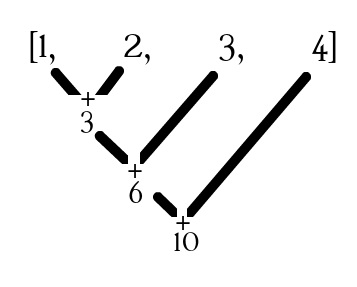

In [85]:
# from math import abs
def dif(a,b) :
    return abs(a-b)

numbers_new = [4,7,23,30]
numbers_new_rdd = spark.sparkContext.parallelize(numbers_new,4)

t = numbers_new_rdd.glom().collect()
print(t)
numbers_new_rdd.reduce(dif)


[[4], [7], [23], [30]]


10

In [88]:
def add(a,b) :
    return a+b

numbers_new = [4,7,23,30]
numbers_new_rdd = spark.sparkContext.parallelize(numbers_new,3)

t = numbers_new_rdd.glom().collect()
print(t)
numbers_new_rdd.reduce(add)


[[4], [7], [23, 30]]


64

In [212]:
numbers_new_rdd.fold(0,add)

64

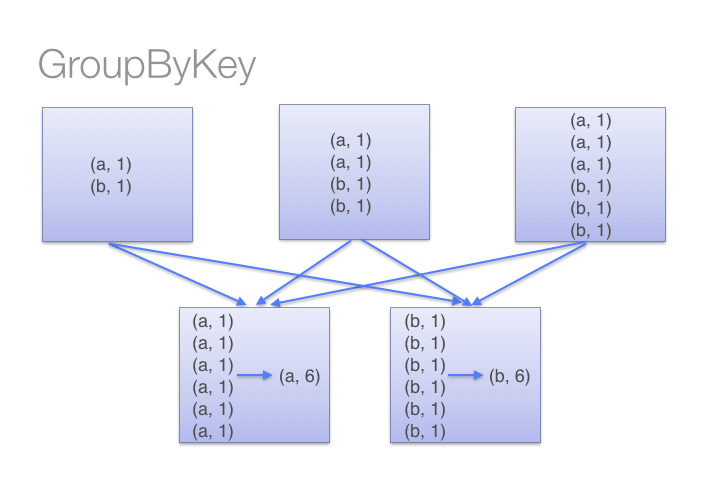

In [89]:
paired_list = [('a',10), ('b',5), ('a',6)]
paired_rdd = spark.sparkContext.parallelize(paired_list,2)
print(paired_rdd.glom().collect())
print(paired_rdd.groupByKey().collect())

[[('a', 10)], [('b', 5), ('a', 6)]]


[('b', <pyspark.resultiterable.ResultIterable object at 0x7f6302f32ca0>), ('a', <pyspark.resultiterable.ResultIterable object at 0x7f6302bd0430>)]


In [221]:
paired_rdd.groupByKey().mapValues(lambda x : sum(x)).collect()

[('b', 5), ('a', 16)]

In [223]:
print(paired_rdd.groupByKey().mapValues(lambda x : sum(x)).toDebugString().decode('utf-8'))

(2) PythonRDD[375] at RDD at PythonRDD.scala:53 []
 |  MapPartitionsRDD[374] at mapPartitions at PythonRDD.scala:145 []
 |  ShuffledRDD[373] at partitionBy at NativeMethodAccessorImpl.java:0 []
 +-(2) PairwiseRDD[372] at groupByKey at /tmp/ipykernel_6917/3111636202.py:1 []
    |  PythonRDD[371] at groupByKey at /tmp/ipykernel_6917/3111636202.py:1 []
    |  ParallelCollectionRDD[349] at readRDDFromFile at PythonRDD.scala:274 []


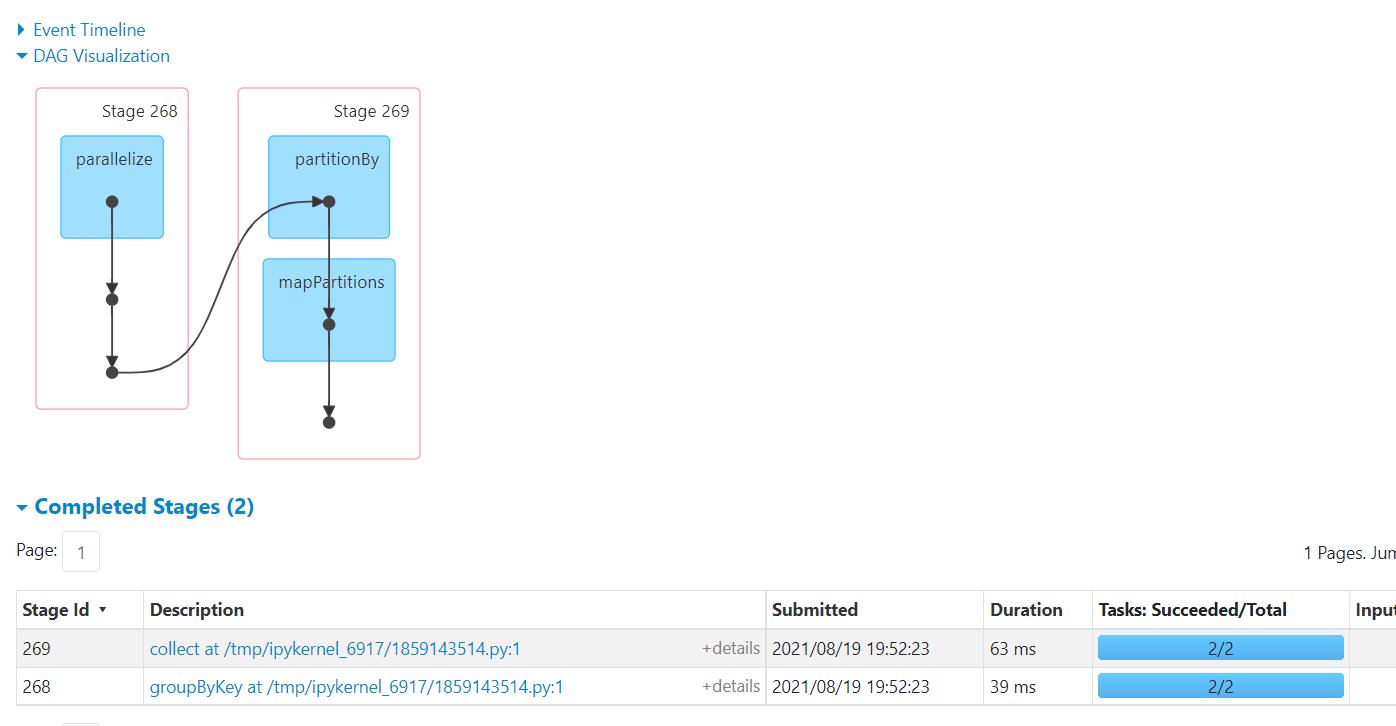

In [231]:
paired_rdd.reduceByKey(add).collect()

[('b', 5), ('a', 16)]

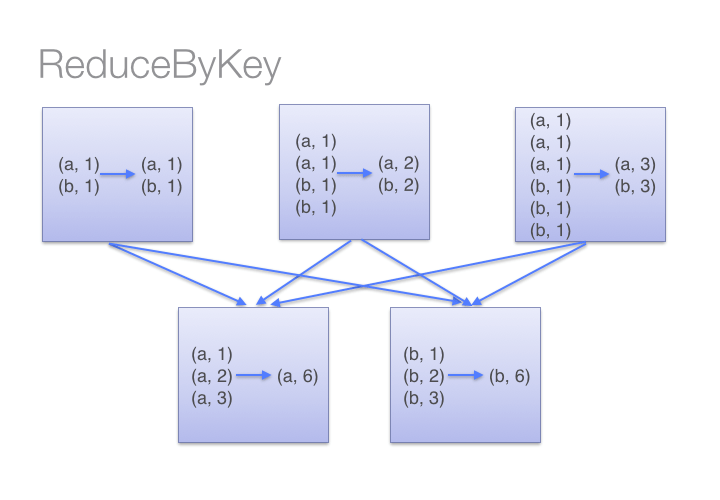

In [232]:
print(paired_rdd.reduceByKey(add).toDebugString().decode('utf-8'))

(2) PythonRDD[418] at RDD at PythonRDD.scala:53 []
 |  MapPartitionsRDD[417] at mapPartitions at PythonRDD.scala:145 []
 |  ShuffledRDD[416] at partitionBy at NativeMethodAccessorImpl.java:0 []
 +-(2) PairwiseRDD[415] at reduceByKey at /tmp/ipykernel_6917/2925283463.py:1 []
    |  PythonRDD[414] at reduceByKey at /tmp/ipykernel_6917/2925283463.py:1 []
    |  ParallelCollectionRDD[349] at readRDDFromFile at PythonRDD.scala:274 []


### cache

In [228]:
new_rdd = paired_rdd.groupByKey()
new_rdd.cache()
new_rdd.mapValues(lambda x : sum(x)).collect()
print(new_rdd.mapValues(lambda x : sum(x)).toDebugString().decode('utf-8'))

(2) PythonRDD[403] at RDD at PythonRDD.scala:53 []
 |  PythonRDD[401] at RDD at PythonRDD.scala:53 []
 |      CachedPartitions: 2; MemorySize: 287.0 B; DiskSize: 0.0 B
 |  MapPartitionsRDD[400] at mapPartitions at PythonRDD.scala:145 []
 |  ShuffledRDD[399] at partitionBy at NativeMethodAccessorImpl.java:0 []
 +-(2) PairwiseRDD[398] at groupByKey at /tmp/ipykernel_6917/1285620099.py:1 []
    |  PythonRDD[397] at groupByKey at /tmp/ipykernel_6917/1285620099.py:1 []
    |  ParallelCollectionRDD[349] at readRDDFromFile at PythonRDD.scala:274 []


In [233]:
print(new_rdd.getStorageLevel())

Memory Serialized 1x Replicated


In [236]:
from pyspark import StorageLevel
new_rdd.unpersist()
new_rdd.persist(StorageLevel.DISK_ONLY)
print(new_rdd.getStorageLevel())

Disk Serialized 1x Replicated


DISK_ONLY = StorageLevel(True, False, False, False, 1)

DISK_ONLY_2 = StorageLevel(True, False, False, False, 2)

MEMORY_AND_DISK = StorageLevel(True, True, False, False, 1)

MEMORY_AND_DISK_2 = StorageLevel(True, True, False, False, 2)

MEMORY_AND_DISK_SER = StorageLevel(True, True, False, False, 1)

MEMORY_AND_DISK_SER_2 = StorageLevel(True, True, False, False, 2)

MEMORY_ONLY = StorageLevel(False, True, False, False, 1)

MEMORY_ONLY_2 = StorageLevel(False, True, False, False, 2)

MEMORY_ONLY_SER = StorageLevel(False, True, False, False, 1)

MEMORY_ONLY_SER_2 = StorageLevel(False, True, False, False, 2)

OFF_HEAP = StorageLevel(True, True, True, False, 1)

### Working With Dataframes

In [237]:
df = spark.read.csv('data/deniro.csv')

df.show(5)

+----+-----+-----------+
| _c0|  _c1|        _c2|
+----+-----+-----------+
|Year|Score|      Title|
|1968|   86|  Greetings|
|1970|   17|Bloody Mama|
|1970|   73|    Hi Mom!|
|1971|   40|Born to Win|
+----+-----+-----------+
only showing top 5 rows



In [238]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)



In [90]:
df = spark.read.csv('data/deniro.csv',header=True,inferSchema=True, )

df.show(10)

+----+-----+--------------------+
|Year|Score|               Title|
+----+-----+--------------------+
|1968|   86|           Greetings|
|1970|   17|         Bloody Mama|
|1970|   73|             Hi Mom!|
|1971|   40|         Born to Win|
|1973|   98|        Mean Streets|
|1973|   88|Bang the Drum Slowly|
|1974|   97|       The Godfather|
|1976|   41|     The Last Tycoon|
|1976|   99|         Taxi Driver|
|1977|   47|                1900|
+----+-----+--------------------+
only showing top 10 rows



In [240]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Score: integer (nullable = true)
 |-- Title: string (nullable = true)



In [92]:
df.filter(df['Score']<50).show()


+----+-----+--------------------+
|Year|Score|               Title|
+----+-----+--------------------+
|1970|   17|         Bloody Mama|
|1971|   40|         Born to Win|
|1976|   41|     The Last Tycoon|
|1977|   47|                1900|
|1989|   47|     We're No Angels|
|1990|   29|      Stanley & Iris|
|1994|   39|Mary Shelley's Fr...|
|1996|   38|             The Fan|
|1998|   38|  Great Expectations|
|1999|   43|            Flawless|
|2000|   43|The Adventures of...|
|2000|   41|        Men of Honor|
|2001|   33|          15 Minutes|
|2002|   48|     City by the Sea|
|2002|   27|        Analyze That|
|2003|    4|             Godsend|
|2004|   35|          Shark Tale|
|2004|   38|    Meet the Fockers|
|2005|    4|The Bridge of San...|
|2005|   46|                Rent|
+----+-----+--------------------+
only showing top 20 rows



In [93]:
import pyspark.sql.functions as f
df.filter(df['Year']<1980).select(f.avg('Score')).show()


+----------+
|avg(Score)|
+----------+
|      70.5|
+----------+



In [94]:
spark.stop()
